In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# ======== 파라미터 ========
training_steps = 22000
display_step = 1000

In [31]:
# ======== 학습데이터 ========
xy = np.loadtxt('logistic_data.txt', unpack=True, dtype='float32')

# 학습시간
x_data = xy[0:-1]

# 기술이민 (PASS: 1 , FAIL: 0)
y_data = xy[-1]

#  배열 위치 변환
X = x_data[:].T
print(X)
Y = y_data.reshape(-1,1)
print(Y)

[[54.]
 [ 8.]
 [30.]
 [24.]
 [46.]
 [12.]
 [20.]
 [37.]
 [40.]
 [48.]]
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [32]:
# ======== W, B 초기값 설정 =========
#W1 = tf.Variable(np.random.randn(), name="weight")
#W2 = tf.Variable(np.random.randn(), name="weight")
#b = tf.Variable(np.random.randn(), name="bias")
W = tf.Variable(0.1)
b = tf.Variable(1.0)
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>

In [33]:
X

array([[54.],
       [ 8.],
       [30.],
       [24.],
       [46.],
       [12.],
       [20.],
       [37.],
       [40.],
       [48.]], dtype=float32)

In [34]:
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>

In [35]:
W * X + b

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[6.4],
       [1.8],
       [4. ],
       [3.4],
       [5.6],
       [2.2],
       [3. ],
       [4.7],
       [5. ],
       [5.8]], dtype=float32)>

In [36]:
h = W * X + b

In [37]:
hypothesis = tf.divide(1., 1. + tf.exp(-h))

In [38]:
# ======== logistic Regression 에서 학습될 가설 ========
# logistic regression : sigmoid 함수
def logistic_regression(X):
    h = W * X + b
    return tf.divide(1., 1. + tf.exp(-h))

In [39]:
# ======== logistic Regression 에서 학습될 가설의 Cost Function ========
def cost_function(y_pred, y_true):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

In [40]:
# ======== Gradient Descent Algorithm 에서 Step ========
learning_rate = 0.0006

In [41]:
# ======== 텐서플로우에 내장된 GradientDescentOptimizer ========
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [42]:
# ======== GradientDescentOptimizer ========
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation. : 자동 미분
    with tf.GradientTape() as g:
        pred = logistic_regression(X)
        cost = cost_function(pred, Y)

    # Compute gradients.
    # gradients = g.gradient(cost, [W, b])
    
    # Update W and b following gradients.
    # optimizer.apply_gradients(zip(gradients, [W, b]))
    
    weight, bias = g.gradient(cost, [W, b])
    #print("1. Weight: " ,weight)
    #print("2. Bais: " ,bias)

    W.assign_sub(learning_rate * weight)
    b.assign_sub(learning_rate * bias)

In [47]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = logistic_regression(X)
        cost = cost_function(pred, Y)
        print("step: %i, cost: %f, W: %f, b: %f" % (step, cost, W.numpy(), b.numpy()))
        #print("예측값 : {}".format(pred.numpy()))
        
        '''
        print("cost type: {}".format(type(cost)))
        print("W type: {}".format(type(W)))
        print("b type: {}".format(type(b)))
        print("pred type: {}".format(type(pred)))
        '''

step: 1000, cost: 0.681599, W: 0.012962, b: 0.885873
step: 2000, cost: 0.661680, W: 0.015877, b: 0.776591
step: 3000, cost: 0.642550, W: 0.018755, b: 0.669494
step: 4000, cost: 0.624193, W: 0.021593, b: 0.564587
step: 5000, cost: 0.606594, W: 0.024391, b: 0.461866
step: 6000, cost: 0.589733, W: 0.027148, b: 0.361323
step: 7000, cost: 0.573589, W: 0.029864, b: 0.262943
step: 8000, cost: 0.558141, W: 0.032537, b: 0.166707
step: 9000, cost: 0.543365, W: 0.035168, b: 0.072589
step: 10000, cost: 0.529238, W: 0.037756, b: -0.019441
step: 11000, cost: 0.515735, W: 0.040300, b: -0.109414
step: 12000, cost: 0.502830, W: 0.042802, b: -0.197369
step: 13000, cost: 0.490500, W: 0.045261, b: -0.283344
step: 14000, cost: 0.478719, W: 0.047677, b: -0.367384
step: 15000, cost: 0.467463, W: 0.050051, b: -0.449530
step: 16000, cost: 0.456706, W: 0.052382, b: -0.529830
step: 17000, cost: 0.446427, W: 0.054673, b: -0.608331
step: 18000, cost: 0.436601, W: 0.056922, b: -0.685080
step: 19000, cost: 0.427206,

In [53]:
# ======== 학습된 우리의 프로그램에 예측 문의 ========
study = 10

# 10  학습 시간일 경우 기술이면 성공 실패 여부
print ("%i 시간 학습: 기술이민 : %r " % (study, logistic_regression(study).numpy() > 0.5))

10 시간 학습: 기술이민 : False 


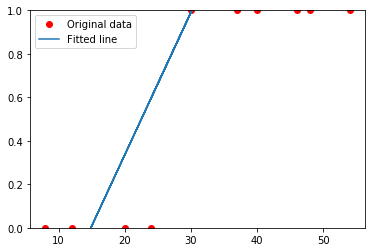

In [52]:
# ======== 학습된 최적의 그래프 그리기 ========
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
tf.math.log_sigmoid